In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/Life_expectancy_dataset.csv", encoding='latin1')
df


,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


In [2]:
df["Life_Category"] = df["Overall Life"].apply(lambda x: "High" if x > 75 else "Low")
df

,Rank,Country,Overall Life,Male Life,Female Life,Continent,Life_Category
0,1,Monaco,89.5,85.6,93.5,Europe,High
1,2,Japan,85.0,81.7,88.5,Asia,High
2,3,Singapore,85.0,82.3,87.8,Asia,High
3,4,Macau; China,84.5,81.6,87.6,Asia,High
4,5,San Marino,83.3,80.7,86.1,Europe,High
...,...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa,Low
219,220,Swaziland,51.6,52.2,51.0,Africa,Low
220,221,Afghanistan,51.3,49.9,52.7,Asia,Low
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa,Low


In [3]:
df = df.drop(['Rank', 'Country'], axis=1)
df

,Overall Life,Male Life,Female Life,Continent,Life_Category
0,89.5,85.6,93.5,Europe,High
1,85.0,81.7,88.5,Asia,High
2,85.0,82.3,87.8,Asia,High
3,84.5,81.6,87.6,Asia,High
4,83.3,80.7,86.1,Europe,High
...,...,...,...,...,...
218,52.1,51.6,52.5,Africa,Low
219,51.6,52.2,51.0,Africa,Low
220,51.3,49.9,52.7,Asia,Low
221,50.6,48.6,52.7,Africa,Low


In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

onehot = OneHotEncoder(sparse_output=False)
continent_encoded = onehot.fit_transform(df[['Continent']])

le = LabelEncoder()
life_category_encoded = le.fit_transform(df['Life_Category'])  

df['Continent'] = continent_encoded
continent_df = pd.DataFrame(
    continent_encoded, 
    columns=[f'Continent_{cat}' for cat in onehot.categories_[0]],
    index=df.index
)
df = df.drop('Continent', axis=1)
df = pd.concat([df, continent_df], axis=1)

df['Life_Category'] = life_category_encoded

df

,Overall Life,Male Life,Female Life,Life_Category,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,89.5,85.6,93.5,0,0.0,0.0,1.0,0.0,0.0,0.0
1,85.0,81.7,88.5,0,0.0,1.0,0.0,0.0,0.0,0.0
2,85.0,82.3,87.8,0,0.0,1.0,0.0,0.0,0.0,0.0
3,84.5,81.6,87.6,0,0.0,1.0,0.0,0.0,0.0,0.0
4,83.3,80.7,86.1,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
218,52.1,51.6,52.5,1,1.0,0.0,0.0,0.0,0.0,0.0
219,51.6,52.2,51.0,1,1.0,0.0,0.0,0.0,0.0,0.0
220,51.3,49.9,52.7,1,0.0,1.0,0.0,0.0,0.0,0.0
221,50.6,48.6,52.7,1,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features = ['Overall Life', 'Male Life', 'Female Life']

df[numerical_features] = scaler.fit_transform(df[numerical_features])
df

,Overall Life,Male Life,Female Life,Life_Category,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,1.000000,1.000000,1.000000,0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.885496,0.894595,0.882353,0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.885496,0.910811,0.865882,0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.872774,0.891892,0.861176,0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.842239,0.867568,0.825882,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
218,0.048346,0.081081,0.035294,1,1.0,0.0,0.0,0.0,0.0,0.0
219,0.035623,0.097297,0.000000,1,1.0,0.0,0.0,0.0,0.0,0.0
220,0.027990,0.035135,0.040000,1,0.0,1.0,0.0,0.0,0.0,0.0
221,0.010178,0.000000,0.040000,1,1.0,0.0,0.0,0.0,0.0,0.0


Mean Squared Error (MSE): 0.0058
Root Mean Squared Error (RMSE): 0.0761
Mean Absolute Error (MAE): 0.0495
R² Score: 0.8586


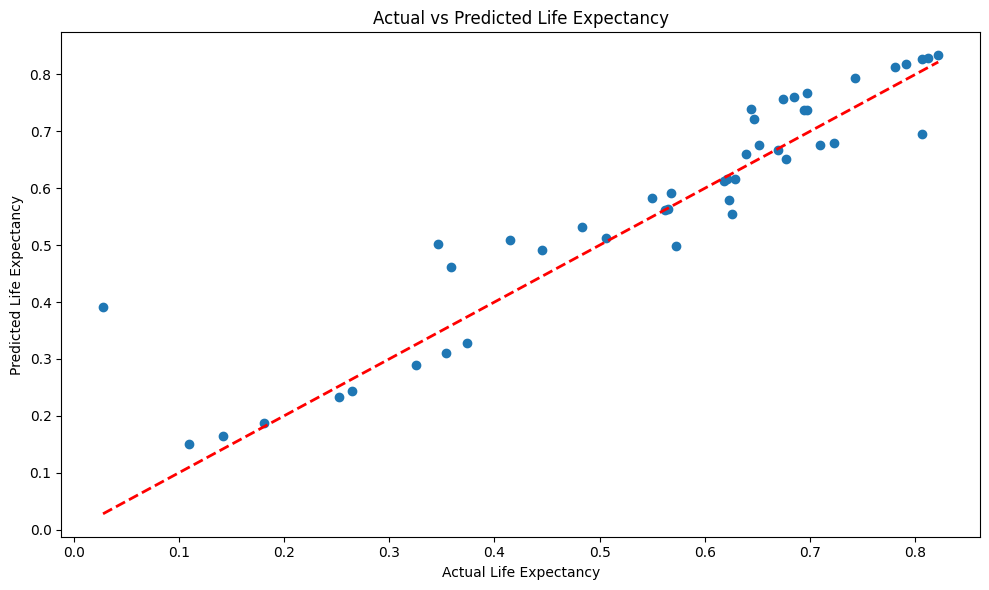

In [6]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X = df.drop(['Overall Life'], axis=1)  
y = df['Overall Life'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr_model = SVR(kernel='rbf')  
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.tight_layout()
plt.show()